In [40]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

In [4]:
t0 = time.time()
data_dir = '../data/'
file = 'online_retail.xlsx'
df_origin = pd.read_excel(data_dir + file)
print('Load in ', time.time() - t0)

Load in  49.07540512084961


In [7]:
data_dir = '../data/'
file = 'online_retail.csv'
df_origin.to_csv(data_dir + file, index=False)

In [10]:
t0 = time.time()
data_dir = '../data/'
file = 'df_sales.csv'
df_sales = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.9602279663085938


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Osaka'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


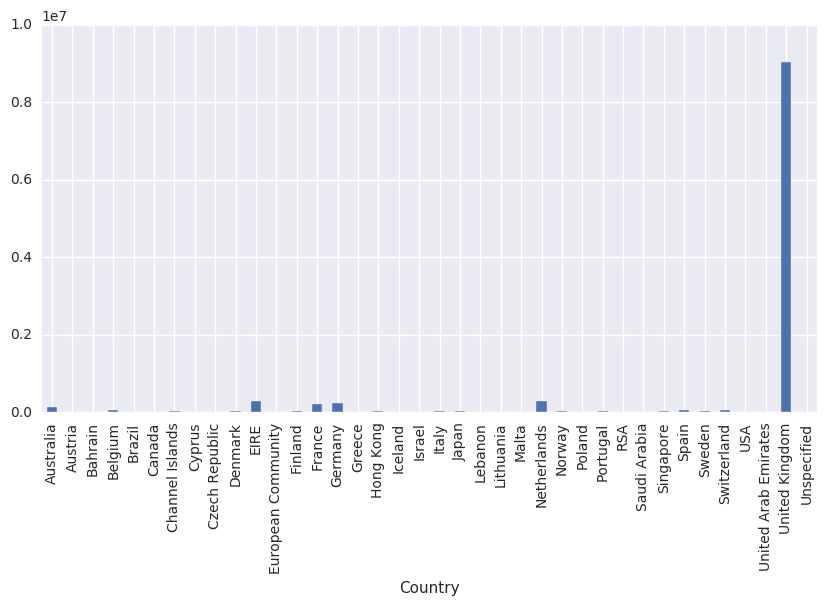

In [12]:
# 各国の売上
# NOTE:
# やはり UK は多い。

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize)
plt.show()

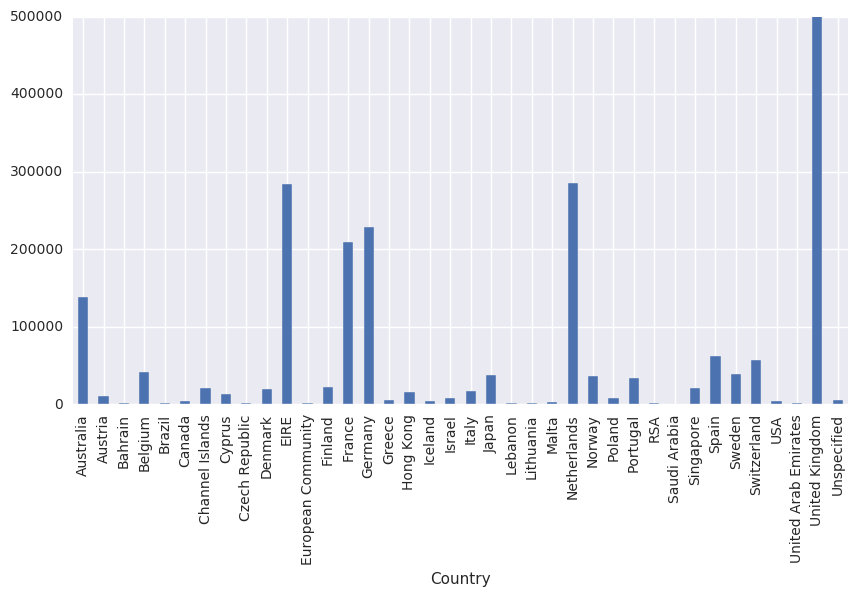

In [13]:
# 各国の売上, UK 以外
# NOTE:
# France, Germany はトランザクション数が多いが売上はそれほどは高くない。
# つまり、1トランザクションあたりの平均売上は小さい。

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize)
plt.ylim(0, 500000)
plt.show()

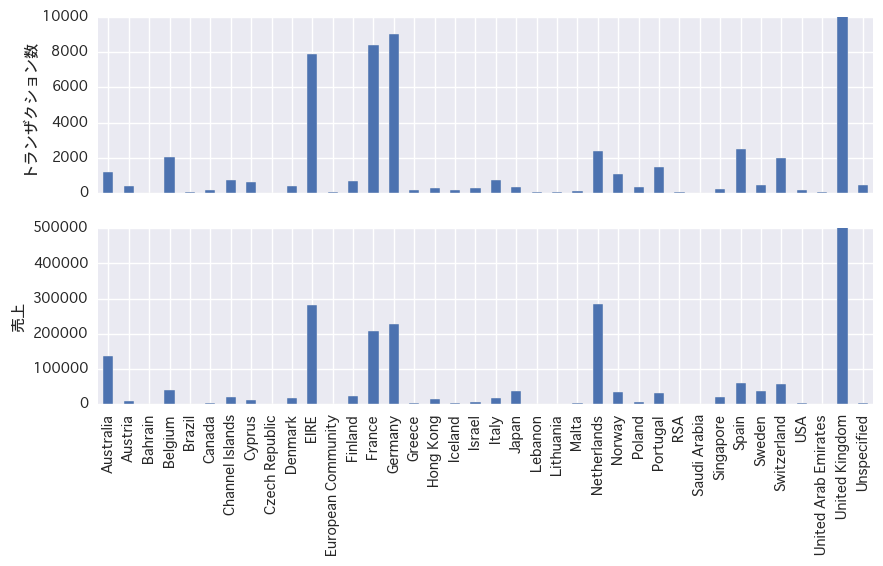

In [104]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

# 上段: トランザクション数
df_sales.groupby('Country').size().plot(kind='bar', ax=ax1)
ax1.set_ylim(0, 10000)
ax1.set_xlabel('')
ax1.set_ylabel('トランザクション数')

# 下段: 売上
df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', ax=ax2)
ax2.set_ylim(0, 500000)
ax2.set_xlabel('')
ax2.set_ylabel('売上')

plt.savefig('国別_総トランザクション数_総売上.png')
plt.show()

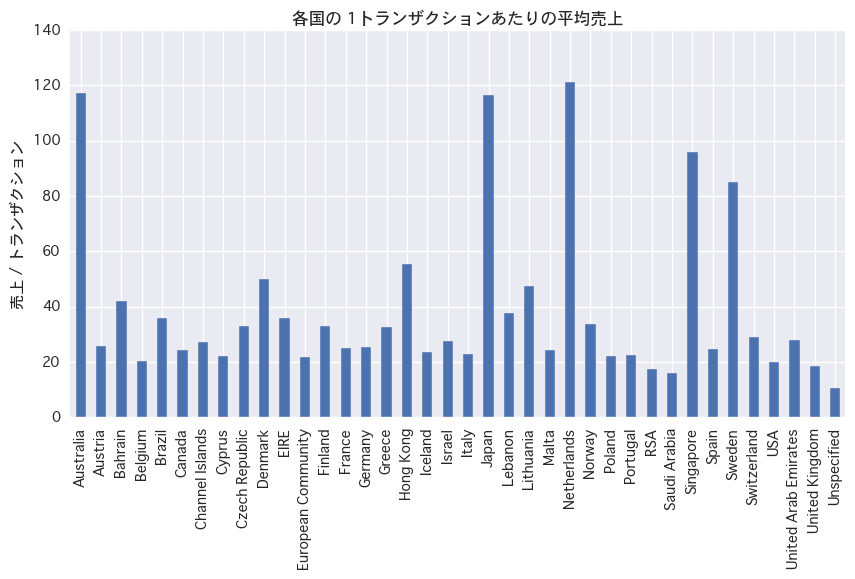

In [85]:
# 各国の 1トランザクションあたりの平均売上

figsize = (10, 5)
df_sales.groupby(['Country'])['Sales'].mean().plot(kind='bar', figsize=figsize)
plt.title('各国の 1トランザクションあたりの平均売上')
plt.xlabel('')
plt.ylabel('売上 / トランザクション')
plt.show()

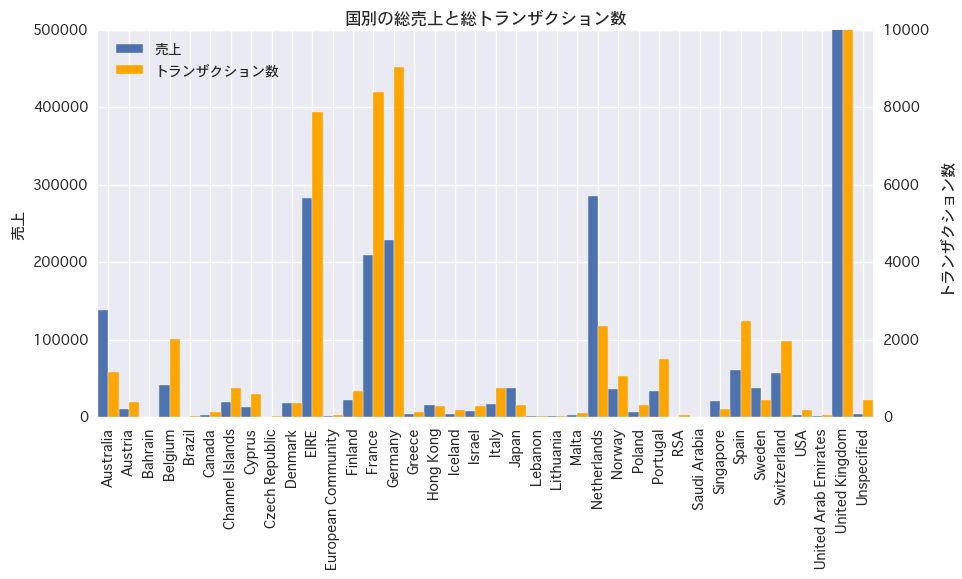

In [82]:
# NOTE: 
# このプロットはよくない。
# Bar plot を 2つ横に並べるのは、前年 / 当年の比較とかであればよさそう。

# 売上

figsize = (10, 5)
fig, ax = plt.subplots(figsize=figsize)

ind = np.arange(df_sales['Country'].nunique())
w = 0.5
countries = df_sales.groupby('Country').size().index

#df_sales.groupby(['Country'])['Sales'].sum().plot(kind='bar', figsize=figsize, ax=ax, x=ind, width=w)
rect1 = ax.bar(ind, df_sales.groupby(['Country'])['Sales'].sum(), width=w)
ax.set_ylim(0, 500000)
ax.set_ylabel('売上')

# トランザクション数
ax2 = ax.twinx()
#df_sales.groupby('Country').size().plot(kind='bar', figsize=figsize, ax=ax2, x=ind + w, width=w, color='orange')
rect2 = ax2.bar(ind + w, df_sales.groupby('Country').size(), width=w, color='orange')
ax2.set_ylim(0, 10000)
ax2.set_ylabel('トランザクション数')
ax2.grid(b=False)

ax.set_xlim(0, len(ind))
ax.set_xticks(ind + w)
ax.set_xticklabels(countries, rotation=90)

ax.legend((rect1[0], rect2[0]), ('売上', 'トランザクション数'), bbox_to_anchor=(0.25, 1))
ax.set_title('国別の総売上と総トランザクション数')

plt.show()

In [53]:
df_sales_by_country_customer = pd.DataFrame(df_sales.groupby(['Country', 'CustomerID'])['Sales'].sum()).reset_index()
df_sales_by_country_customer.head()

,Country,CustomerID,Sales
0,Australia,12386.0,401.90
1,Australia,12388.0,2780.66
2,Australia,12393.0,1582.60
3,Australia,12415.0,124914.53
4,Australia,12422.0,386.20


## 各 Country の 各 Customer の売上の構成比

In [66]:
# 各国の 各 Customer　の構成比
country = 'Singapore'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
356,Singapore,12744.0,21279.29,100.0


In [70]:
# 各国の 各 Customer　の構成比
country = 'Netherlands'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
318,Netherlands,14646.0,280206.02,98.164166
310,Netherlands,12759.0,1531.44,0.536507
311,Netherlands,12775.0,1386.04,0.485569
312,Netherlands,12778.0,822.23,0.288051
313,Netherlands,12787.0,463.66,0.162433
317,Netherlands,12802.0,427.58,0.149793
315,Netherlands,12790.0,324.92,0.113829
316,Netherlands,12791.0,192.60,0.067473
314,Netherlands,12789.0,91.85,0.032178


In [67]:
# 各国の 各 Customer　の構成比
country = 'Sweden'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
394,Sweden,17404.0,31906.82,83.137594
387,Sweden,12483.0,2484.98,6.474956
391,Sweden,12676.0,1331.39,3.469119
392,Sweden,12697.0,957.59,2.495132
388,Sweden,12638.0,671.69,1.750180
389,Sweden,12639.0,486.10,1.266600
393,Sweden,12715.0,353.86,0.922031
390,Sweden,12641.0,185.90,0.484388


In [68]:
# 各国の 各 Customer　の構成比
country = 'Australia'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
3,Australia,12415.0,124914.53,90.177121
6,Australia,12431.0,5514.67,3.981099
1,Australia,12388.0,2780.66,2.007388
5,Australia,12424.0,1760.96,1.271256
2,Australia,12393.0,1582.60,1.142496
7,Australia,12434.0,806.14,0.581961
0,Australia,12386.0,401.90,0.290136
4,Australia,12422.0,386.20,0.278802
8,Australia,16321.0,373.65,0.269742


In [69]:
# 各国の 各 Customer　の構成比
country = 'Japan'

df_the_country = df_sales_by_country_customer[df_sales_by_country_customer['Country'] == country]
df_the_country['Sales_%'] = \
(df_the_country['Sales'] / df_the_country['Sales'].sum()) * 100
df_the_country.sort_values('Sales', ascending=False)

/Users/fujiki/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Country,CustomerID,Sales,Sales_%
298,Japan,12753.0,21429.39,57.272766
304,Japan,12798.0,6977.04,18.647025
300,Japan,12755.0,3811.95,10.187920
299,Japan,12754.0,3010.74,8.046585
303,Japan,12770.0,1351.45,3.611922
302,Japan,12763.0,494.08,1.320492
305,Japan,12812.0,229.64,0.613742
301,Japan,12756.0,112.08,0.299548


In [24]:
# 重要顧客を識別する
# その顧客の売上の全体に占める比率が高い顧客

df_sales_by_customer = pd.DataFrame(df_sales.groupby('CustomerID')['Sales'].sum()).reset_index()
print('# of Customers = ', df_sales_by_customer.shape[0])

# of Customers =  4338


In [28]:
df_sales_by_customer['Sales_%'] = \
(df_sales_by_customer['Sales'] / df_sales_by_customer['Sales'].sum()) * 100
df_sales_by_customer.head()

,CustomerID,Sales,Sales_%
0,12346.0,77183.60,0.866121
1,12347.0,4310.00,0.048365
2,12348.0,1797.24,0.020168
3,12349.0,1757.55,0.019722
4,12350.0,334.40,0.003752


In [80]:
df_sales_by_customer_sorted = \
df_sales_by_customer.sort_values('Sales', ascending=False)
df_sales_by_customer_sorted.head()

,CustomerID,Sales,Sales_%
1689,14646.0,280206.02,3.144352
4201,18102.0,259657.30,2.913763
3728,17450.0,194550.79,2.183166
3008,16446.0,168472.50,1.890526
1879,14911.0,143825.06,1.613943


In [79]:
# Customer と Country の対応 (ただし Country が複数ある Customer は無視している)
df_customer_country = \
pd.DataFrame(df_origin.groupby('CustomerID')['Country'].max()).reset_index()
df_customer_country.head()

,CustomerID,Country
0,12346.0,United Kingdom
1,12347.0,Iceland
2,12348.0,Finland
3,12349.0,Italy
4,12350.0,Norway


In [86]:
# 売上上位 10 の顧客の Country
# NOTE:
# 売上1位, Netherlands 売上1位の 14646 と 
# 売上6位, Australia 売上1位の 12415 に注目された。

df_sales_by_customer_sorted.set_index('CustomerID')\
.join(df_customer_country.set_index('CustomerID'), how='left').head(10)

,Sales,Sales_%,Country
CustomerID,,,
14646.0,280206.02,3.144352,Netherlands
18102.0,259657.30,2.913763,United Kingdom
17450.0,194550.79,2.183166,United Kingdom
16446.0,168472.50,1.890526,United Kingdom
14911.0,143825.06,1.613943,EIRE
12415.0,124914.53,1.401737,Australia
14156.0,117379.63,1.317184,EIRE
17511.0,91062.38,1.021863,United Kingdom
16029.0,81024.84,0.909226,United Kingdom


## Country を複数持つ Customer

In [48]:
# Country を複数持つ Customer
# NOTE:
# なぜ Country を複数持つのか？ は置いておく。
# これらの顧客は Sales 上位の顧客ではないので、影響は小さいのではないか？

df_customer_country = pd.DataFrame(df_sales.groupby('CustomerID')['Country'].nunique())
df_customer_country[df_customer_country['Country'] > 1]

,Country
CustomerID,
12370.0,2
12394.0,2
12417.0,2
12422.0,2
12429.0,2
12431.0,2
12455.0,2
12457.0,2


In [42]:
# 顧客の中には Country が複数ある顧客もいる
# この顧客は途中で Country が変更したわけでもない。

df_sales[df_sales['CustomerID'] == 12370.0]['Country'].unique()
display(df_sales[(df_sales['CustomerID'] == 12370.0) & (df_sales['Country'] == 'Austria')])
display(df_sales[(df_sales['CustomerID'] == 12370.0) & (df_sales['Country'] == 'Cyprus')].tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
33511,539330,37449,CERAMIC CAKE STAND + HANGING CAKES,8,2010-12-17 09:38:00,8.50,12370.0,Austria,68.0
33512,539330,37446,MINI CAKE STAND WITH HANGING CAKES,8,2010-12-17 09:38:00,1.45,12370.0,Austria,11.6
33513,539330,22962,JAM JAR WITH PINK LID,12,2010-12-17 09:38:00,0.85,12370.0,Austria,10.2
33514,539330,21428,SET3 BOOK BOX GREEN GINGHAM FLOWER,4,2010-12-17 09:38:00,4.25,12370.0,Austria,17.0
33515,539330,22113,GREY HEART HOT WATER BOTTLE,4,2010-12-17 09:38:00,3.75,12370.0,Austria,15.0
33516,539330,22313,OFFICE MUG WARMER PINK,6,2010-12-17 09:38:00,2.95,12370.0,Austria,17.7
33517,539330,22312,OFFICE MUG WARMER POLKADOT,6,2010-12-17 09:38:00,2.95,12370.0,Austria,17.7
33518,539330,POST,POSTAGE,3,2010-12-17 09:38:00,40.00,12370.0,Austria,120.0


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
398023,571905,22571,ROCKING HORSE RED CHRISTMAS,12,2011-10-19 14:51:00,0.85,12370.0,Cyprus,10.20
398024,571905,22154,ANGEL DECORATION 3 BUTTONS,48,2011-10-19 14:51:00,0.42,12370.0,Cyprus,20.16
398025,571905,22575,METAL MERRY CHRISTMAS WREATH,8,2011-10-19 14:51:00,1.95,12370.0,Cyprus,15.60
398026,571905,23210,WHITE ROCKING HORSE HAND PAINTED,24,2011-10-19 14:51:00,1.25,12370.0,Cyprus,30.00
398027,571905,23213,STAR WREATH DECORATION WITH BELL,12,2011-10-19 14:51:00,1.25,12370.0,Cyprus,15.00
